<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Alejandro Michel Marrón

**Fecha:** 22 de octubre del 2020.

**Expediente** : 719889.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 7: Clases 14 y 15

# Tarea Clase 14

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/x26ticp.png")

In [2]:
import math
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd
from itertools import cycle  # Librería para hacer ciclos

In [3]:
# Solución Alejandro Michel
# Funciones
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a) / len(U) * np.sum(f(U))

# Muestreo Estratíficado
def mest_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   N:'Muestra de números U~[a,b]',
                   NE:'Número de Estratos'):
    delta = (b-a) / NE
    d = pd.DataFrame(np.random.uniform(a, a+delta, round(N/NE)))
    i = 1
    while i <= NE - 1:
        i += 1
        a += delta
        d1 = pd.DataFrame(np.random.uniform(a, a+delta, round(N/NE)))
        d = pd.concat([d, d1], axis = 1)
    dnp = d.to_numpy()
    dnp = dnp.transpose()
    return (b-a) / (len(dnp)**(round(np.log10(N))-1)) * np.sum(f(dnp))






In [4]:
#Datos inicio, Intervalo, Terminos
I = 1/3
Estr = 10
a = 0; b = 1 
N = np.logspace(1, 7, 7, dtype=int) 
N2 = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

### Int_Montecarlo
ui = list(map(lambda N: np.random.uniform(a, b, N), N)) 
fInt = list(map(lambda Y: int_montecarlo(lambda x:x**2, a, b, Y), ui))  



### Est_Montecarlo
fEst = list(map(lambda Y: mest_montecarlo(lambda x:x**2, a , b, Y, Estr), N2))


### DataFrame 
df = pd.DataFrame(index= N, columns= ['Montecarlo Crudo', 'Error_relativo1%', 'Muestreo Estratíficado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos" 
df.loc[N, "Montecarlo Crudo"] = fInt
df.loc[N, "Error_relativo1%"] = np.abs(df.loc[N, "Montecarlo Crudo"] -I)* 100 / I
df.loc[N, "Muestreo Estratíficado"] = fEst
df.loc[N, "Error_relativo2%"] = np.abs(df.loc[N, "Muestreo Estratíficado"] -I)* 100 / I
df


,Montecarlo Crudo,Error_relativo1%,Muestreo Estratíficado,Error_relativo2%
Cantidad_terminos,,,,
10,0.318040,4.587869,0.330530,0.840948
100,0.347940,4.382082,0.327435,1.769548
1000,0.340482,2.144626,0.333033,0.090189
10000,0.337422,1.226726,0.333007,0.097986
100000,0.334605,0.381561,0.333289,0.013425
1000000,0.333770,0.130850,0.333325,0.002587
10000000,0.333193,0.042239,0.333326,0.002170


# Código de solución Gabriela
.
.
.
.


#  Tarea Clase 15



In [5]:
Image(url= "https://i.imgur.com/sQa0ojR.png")

Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

In [6]:
# Solución Alejandro Michel

Función $f(x) = \begin{cases}\frac{3}{2}x^{2}, &-1\leq x \leq 1\\ 0,& otherwise \end{cases}$

Valor esperado: 
$$E[x] = \int_{-\infty}^{-\infty} x f(x) dx = \int_{-1}^{1} x \frac{3}{2} x^{2} dx = \frac{3}{2} \int_{-1}^{1}  x^{3} dx = \frac{3}{2} \frac{x^{4}}{4} \Big|_{-1}^{1} = \frac{3}{8} [1 - 1] = 0$$

Distribución acumulada:
$$F(x) =  \int_{-\infty}^{x} f(x) dx = \int_{-1}^{x} \frac{3}{2} x^{2} dx = \frac{3}{2} \int_{-1}^{x} x^{2} dx = \frac{3}{2} \frac{x^{3}}{3} \Big|_{-1}^{x} = \frac{x^{3}}{2} \Big|_{-1}^{x} = \frac{x^{3}}{2} - \frac{-1}{2} = \frac{x^{3} + 1}{2}  $$

Método de la transformada inversa:

$$y = \frac{ x^{3} + 1}{2} $$

$$2 y = x^{3} + 1  $$

$$ 2 y - 1 = x^{3} $$

$$ x = [ 2y - 1]^{\frac{1}{3}} $$




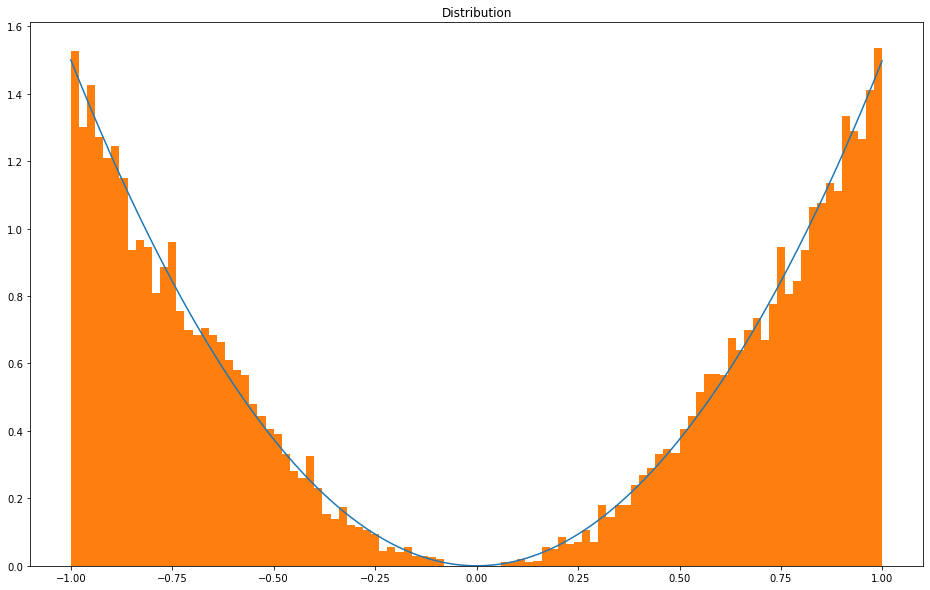

Estimacíon de la media = -0.1731547386116053


In [7]:
#a)

# Funciones
xi = lambda u: (2*u -1)**(1 / 3) if u > 0.5 else -(1-2* u)**(1 / 3)
f = lambda x: 1.5 * x**2 if x <= 1 and x >= -1 else 0


# Validation
x = np.arange(-1, 1, 0.001)
u = np.random.rand(10000)
fl = list(map(xi, u))

# Plot
plt.figure(figsize= (16, 10))
plt.plot(x, list(map(f, x)))
plt.hist(fl, 100,  density=True)
plt.title('Distribution')
plt.show()

#Crude Montecarlo Technique
np.random.seed(420)
mcmean = np.mean(list(map(xi, np.random.rand(10))))
print('Estimacíon de la media =', mcmean)

In [8]:
# b)
np.random.seed(420)


# Stratified sampling
r1 = np.random.uniform(0, 0.6, 3)
r2 = np.random.uniform(0.6, 0.9, 3)
r3 = np.random.uniform(0.9, 1, 4)
r = [r1, r2, r3]

# Weighing
w1 = (3/10)/0.6
w2 = (3/10)/0.3
w3 = (4/10)/0.1
w = [w1, w2, w3]

# Funciones
mest = list(map(lambda r: np.array(list(map(xi, r))), r))
sam = list(map(lambda wi, xi: xi/ wi, w, mest))

print('Media =', np.mean(np.concatenate(sam)))

Media = -0.16737464077723668


In [9]:
# c)
u = np.random.rand(10000)
cu = 1-u
ut = [u, cu ]

mf = list(map(lambda u: np.array(list(map(xi, u))), ut))
np.mean(mf)

1.4210854715202004e-18

In [10]:
# d)

def stratified(a, b: "limites", Est: "Número de estratos"):
    ru = np.random.uniform(a, b, Est)
    ii = np.arange(0, Est)
    vec = (ru+ii)/ Est
    return vec

bs = [2, 4, 6, 10]

a =  np.array(list(map(lambda x: stratified(0, 1, x), bs)))

sample = np.array(list(map(lambda x: np.array(list(map(xi, x))), a)))

med = [np.mean(sample[x]) for x in range(4)]
med

C:\Users\aleja\anaconda3\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
C:\Users\aleja\anaconda3\lib\site-packages\ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


[0.33327259264310827,
 -0.02591627101803448,
 -0.010980940124567351,
 0.02189307136348575]

#### Conclusión

El método estratíficado te proporciona una aproximación más certera que el crudo. En este punto las diferencias pueden no ser particularmente relevantes por lo mínimas que llegan a ser. El método que provee una mayor exactitud resulta ser el de los números complementarios, la simetría ayuda a traer un valor virtualmente identico al 0.

# Código de solución  Gabriela
. 
.
.
.
